In [146]:
%matplotlib inline

import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format

import matplotlib.pyplot as plt
plt.style.use = "default"

pd.__version__

'0.22.0'

In [147]:
train = pd.read_csv("data/TrainData1.txt", sep='\t')
labels = pd.read_csv("data/TrainLabel1.txt", sep='\t')

In [148]:
train.describe()

,3.82425408486233,1.92376196082870,1.91844974240116,2.35206669080519,3.11729781664639,3.05173505129779,3.30797713222509,3.43022183905707,3.58666718050779,3.60521774740972,...,1.83683028648888.12,1.85564028089015.11,1.14238946611884.6,2.05434488876763.5,2.80822448109616,1.78218586649202.12,2.66570291403744.1,2.46821436276855.2,2.47858092374228.4,2.30884176126132.4
count,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,...,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000
mean,13422818791946309457778495933816971564560215186...,67114093959731547288892479669084857822801075932...,13422818791946309457778495933816971564560215186...,13422818791946309457778495933816971564560215186...,20134228187919464186667743900725457346840322779...,13422818791946309457778495933816971564560215186...,3.504,13422818791946309457778495933816971564560215186...,13422818791946309457778495933816971564560215186...,26845637583892618915556991867633943129120430373...,...,26845637583892618915556991867633943129120430373...,67114093959731547288892479669084857822801075932...,1.250,40268456375838928373335487801450914693680645559...,67114093959731547288892479669084857822801075932...,67114093959731547288892479669084857822801075932...,67114093959731547288892479669084857822801075932...,26845637583892618915556991867633943129120430373...,33557046979865773644446239834542428911400537966...,13422818791946309457778495933816971564560215186...
std,11546481745700334532041446684281935174181082516...,81923192051904040180026773983385323642459353772...,11546481745700336049751518735632771830010697222...,11546481745700337567461590786983608485840311928...,14093311897214878950381315815876273286336264059...,11546481745700337567461590786983608485840311928...,0.129,11546481745700337567461590786983608485840311928...,11546481745700337567461590786983608485840311928...,16217727724465412374902982829292987442685014929...,...,16217727724465409339482838726591314131025785517...,81923192051904040180026773983385323642459353772...,0.341,19725119911506460485109985481592386033114246749...,81923192051904040180026773983385323642459353772...,81923192051904055357127494496893690200755500830...,81923192051904040180026773983385323642459353772...,16217727724465412374902982829292987442685014929...,18069338605547722241511982604358942422451091585...,11546481745700336049751518735632771830010697222...
min,3.719,1.000,1.000,1.795,2.705,2.895,3.032,2.988,3.241,3.380,...,1.000,1.000,1.000,1.859,2.571,1.338,2.273,1.000,1.627,1.195
25%,3.821,1.621,1.702,2.291,3.262,3.253,3.430,3.446,3.551,3.602,...,1.414,1.574,1.000,2.103,2.966,1.768,2.501,1.000,2.323,1.945
50%,3.855,1.966,1.895,2.447,3.369,3.378,3.528,3.500,3.617,3.640,...,1.803,1.723,1.000,2.153,3.081,1.882,2.586,1.723,2.545,2.094
75%,3.894,2.177,2.097,2.619,3.466,3.478,3.579,3.564,3.661,3.679,...,2.042,1.865,1.457,2.243,3.215,2.024,2.636,2.063,2.690,2.225
max,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,3.736,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,2.652,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...


In [149]:
labels.describe()

,1
count,149.000
mean,1.604
std,1.096
min,1.000
25%,1.000
50%,1.000
75%,2.000
max,5.000


# Data Cleaning

#### Todos:
+ figure out how many and which rows for each column have these huge numbers
+ figure out a way to map the values to ones that fit more with the data 
    * make them "average joes"

In [150]:
fr = train.iloc[0,:] # first row
poten_errors = fr[fr > fr.mean()]
poten_errors.describe()

count                                               69.000
mean    10000000000000002101697803323328251387822715387...
std     12230631806435245486489244355180364340614809249...
min     10000000000000000887529745682247582063159023622...
25%     10000000000000000887529745682247582063159023622...
50%     10000000000000000887529745682247582063159023622...
75%     10000000000000000887529745682247582063159023622...
max     10000000000000000887529745682247582063159023622...
Name: 0, dtype: float64

In [151]:
fr[~(fr > fr.mean())].describe()

count   3243.000
mean       2.167
std        0.553
min        1.000
25%        1.884
50%        2.194
75%        2.482
max        3.904
Name: 0, dtype: float64

We have 69 rows with vastly diffrent values. We can't just drop the rows or columns because the signal to noise ratio for both axis is really low. Lets find out more about these errors.

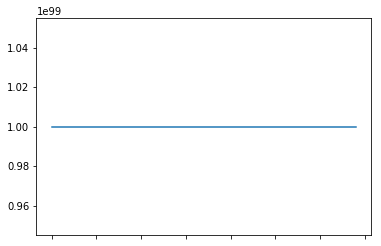

In [152]:
poten_errors.plot.line()

It seems like all the error numbers are the same even though the standard deviation, mean, and max are different numbers. Let's verify that the numbers are actually the same.

In [153]:
mMax = poten_errors.max()
all_diffs = [mMax - i for i in poten_errors]
extreme_diffs = poten_errors.max() - poten_errors.min()

print("Max - Min\n", extreme_diffs, "\nMax - All\n", all_diffs)

Max - Min
 0.0 
Max - All
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Since all the errors are indeed the same number, lets replace all of them with the mean of the particular column that they're in for now. We can think of a better way to replace those values later.

In [154]:
for col in train.columns:
    train_col = train[col]
    gt_mean = train_col > train_col.mean()
    new_col_mean = train_col[~gt_mean].mean()
    
    train[col][gt_mean] = new_col_mean

In [155]:
train.describe()

,3.82425408486233,1.92376196082870,1.91844974240116,2.35206669080519,3.11729781664639,3.05173505129779,3.30797713222509,3.43022183905707,3.58666718050779,3.60521774740972,...,1.83683028648888.12,1.85564028089015.11,1.14238946611884.6,2.05434488876763.5,2.80822448109616,1.78218586649202.12,2.66570291403744.1,2.46821436276855.2,2.47858092374228.4,2.30884176126132.4
count,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,...,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000
mean,3.854,1.889,1.878,2.449,3.348,3.356,3.386,3.480,3.593,3.633,...,1.683,1.729,1.031,2.161,3.083,1.889,2.574,1.620,2.483,2.060
std,0.048,0.392,0.304,0.227,0.178,0.175,0.063,0.120,0.092,0.061,...,0.418,0.265,0.058,0.111,0.197,0.231,0.107,0.524,0.284,0.231
min,3.719,1.000,1.000,1.795,2.705,2.895,3.032,2.988,3.241,3.380,...,1.000,1.000,1.000,1.859,2.571,1.338,2.273,1.000,1.627,1.195
25%,3.821,1.621,1.702,2.291,3.262,3.253,3.386,3.446,3.551,3.602,...,1.414,1.574,1.000,2.103,2.966,1.768,2.501,1.000,2.323,1.945
50%,3.854,1.949,1.887,2.447,3.363,3.372,3.386,3.498,3.608,3.638,...,1.763,1.723,1.000,2.153,3.081,1.882,2.585,1.673,2.539,2.093
75%,3.887,2.172,2.092,2.599,3.457,3.466,3.395,3.559,3.658,3.677,...,2.027,1.862,1.031,2.218,3.212,2.021,2.636,2.053,2.669,2.217
max,3.973,2.695,2.619,2.966,3.720,3.722,3.502,3.689,3.742,3.743,...,2.321,2.625,1.246,2.512,3.527,2.724,2.800,2.903,3.084,2.576


Lets find out how correlated each of these variabels are with the label.

In [158]:
def corr(labels, train):
    n = len(labels)
    v1, v2 = labels.values, train.values
    sums = np.multiply.outer(v2.sum(0), v1.sum(0))
    stds = np.multiply.outer(v2.std(0), v1.std(0))
    return pd.DataFrame((v2.T.dot(v1) - sums / n) / stds / n, train.columns, labels.columns)

In [166]:
train_label_corr = corr(labels, train)

In [178]:
def count_corrs(correlation_result, with_labels=True):
    if with_labels:
        return [(i, correlation_result[correlation_result > i].dropna().size) for i in np.arange(0,1.1,.1)]
    else:
        return [correlation_result[correlation_result > i].dropna().size for i in np.arange(0,1.1,.1)]

In [179]:
count_corrs(train_label_corr)

[(0.0, 1907),
 (0.1, 1459),
 (0.2, 1090),
 (0.30000000000000004, 687),
 (0.4, 369),
 (0.5, 161),
 (0.6000000000000001, 37),
 (0.7000000000000001, 4),
 (0.8, 0),
 (0.9, 0),
 (1.0, 0)]

Looks like there are lots of columns that aren't at all correlated with the labels. Let's drop all the ones who have a 20% or lower correlation. 

*idea: to improve the model, we could look into using the 20% category and play with corrlated columns in that category.*

In [185]:
train = train[train_label_corr[train_label_corr >= .3].dropna().index]

In [188]:
train.describe()

,1.75204844781944,2.33609934008509.1,2.40716987648371,2.31954325807731,1.88530466758897,1.72794770954480,3.44173440099782,1.27760921430409,1.4,2.68337128648794,...,2.87842412570733,1.90768002424242.12,2.76071643747420.4,1.53364497879876.10,1.75204844781944.13,2.21232080314198.9,2.32163984904169.9,2.16070857229243.10,2.76071643747420.5,2.05434488876763.5
count,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,...,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000
mean,1.697,2.388,2.488,1.926,1.941,1.934,3.310,1.513,1.601,2.508,...,3.079,1.920,2.615,1.454,1.587,2.242,2.393,2.174,2.801,2.161
std,0.278,0.125,0.179,0.436,0.329,0.405,0.104,0.410,0.429,0.272,...,0.103,0.294,0.182,0.448,0.346,0.153,0.204,0.148,0.134,0.111
min,1.000,2.054,2.087,1.000,1.000,1.000,2.933,1.000,1.000,1.366,...,2.722,1.483,2.148,1.000,1.000,1.946,1.919,1.792,2.493,1.859
25%,1.549,2.315,2.369,1.755,1.791,1.826,3.256,1.231,1.229,2.395,...,3.027,1.758,2.496,1.000,1.380,2.138,2.273,2.088,2.727,2.103
50%,1.689,2.370,2.476,2.016,1.958,2.008,3.310,1.475,1.676,2.511,...,3.083,1.863,2.613,1.387,1.587,2.225,2.368,2.182,2.780,2.153
75%,1.848,2.464,2.583,2.234,2.137,2.140,3.368,1.659,1.965,2.684,...,3.137,1.955,2.721,1.676,1.717,2.324,2.502,2.265,2.847,2.218
max,2.579,2.789,3.020,2.602,2.696,3.539,3.581,3.027,2.434,3.155,...,3.357,3.050,3.210,3.178,2.558,2.704,3.001,2.500,3.263,2.512


We still have so many columns. For now, it's fine but we could use PCA to reduce the columns.

In [213]:
# http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html
# https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/
# https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
train_corrs = train.corr()
correlation_threshold = .85
# threshold for dropping correlated columns
high_corrs = {}
for col in train_corrs:
    df = train_corrs[col]
    corrs = df[df >= correlation_threshold].dropna().keys().drop(col)
    if corrs.size > 0:
        high_corrs[col] = corrs

In [215]:
new_label_map = {}
for i, col in enumerate(train.columns):
    new_label_map[col] = "f{}".format(i)

train = train.rename(columns=new_label_map)

labels = labels.rename(columns={"1": "label"})
merged = labels.merge(train, left_index=True,right_index=True)

train.columns

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f677', 'f678', 'f679', 'f680', 'f681', 'f682', 'f683', 'f684', 'f685',
       'f686'],
      dtype='object', length=687)

# Data Analysis
- Are there a lot of outliers? If so, how many?
- What is the relationship between each of the variables and the label? Linear? Parabolic?

In [216]:
train.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f677,f678,f679,f680,f681,f682,f683,f684,f685,f686
count,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,...,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000
mean,1.697,2.388,2.488,1.926,1.941,1.934,3.310,1.513,1.601,2.508,...,3.079,1.920,2.615,1.454,1.587,2.242,2.393,2.174,2.801,2.161
std,0.278,0.125,0.179,0.436,0.329,0.405,0.104,0.410,0.429,0.272,...,0.103,0.294,0.182,0.448,0.346,0.153,0.204,0.148,0.134,0.111
min,1.000,2.054,2.087,1.000,1.000,1.000,2.933,1.000,1.000,1.366,...,2.722,1.483,2.148,1.000,1.000,1.946,1.919,1.792,2.493,1.859
25%,1.549,2.315,2.369,1.755,1.791,1.826,3.256,1.231,1.229,2.395,...,3.027,1.758,2.496,1.000,1.380,2.138,2.273,2.088,2.727,2.103
50%,1.689,2.370,2.476,2.016,1.958,2.008,3.310,1.475,1.676,2.511,...,3.083,1.863,2.613,1.387,1.587,2.225,2.368,2.182,2.780,2.153
75%,1.848,2.464,2.583,2.234,2.137,2.140,3.368,1.659,1.965,2.684,...,3.137,1.955,2.721,1.676,1.717,2.324,2.502,2.265,2.847,2.218
max,2.579,2.789,3.020,2.602,2.696,3.539,3.581,3.027,2.434,3.155,...,3.357,3.050,3.210,3.178,2.558,2.704,3.001,2.500,3.263,2.512


Standard deviation is really good. Lets find outliers by getting the values that are `mean + std*n, n= {2 to 5}`

In [247]:
calc_low_high = lambda mean, std, i: (df.mean() + (df.std()*float(i)), df.mean() + (df.std()*float(i+1)))

v = {}
for col in train:
    df = train[col]
    f = []
    stds_from_min = np.floor((df.min() - df.mean()) / df.std())
    for i in range(int(stds_from_min), 0):
        low, high = calc_low_high(df.mean(), df.std(), i)
        num_in_range = df[(low < df) & (df < high)].size
        f.append((i, num_in_range))
    
    stds_from_max = (df.max() - df.mean()) / df.std()
    for i in range(int(np.ceil(stds_from_max))):
        low, high = calc_low_high(df.mean(), df.std(), i)
        num_in_range = df[(low < df) & (df < high)].size
        f.append((i, num_in_range))
    v[col] = f

In [250]:
for key in v:
    

{'f0': [(-3, 4), (-2, 17), (-1, 56), (0, 55), (1, 11), (2, 5), (3, 1)],
 'f1': [(-3, 3), (-2, 17), (-1, 64), (0, 39), (1, 20), (2, 4), (3, 1)],
 'f10': [(-4, 1),
  (-3, 2),
  (-2, 21),
  (-1, 53),
  (0, 44),
  (1, 23),
  (2, 2),
  (3, 1)],
 'f100': [(-3, 1), (-2, 19), (-1, 60), (0, 46), (1, 15), (2, 8)],
 'f101': [(-3, 2),
  (-2, 15),
  (-1, 67),
  (0, 48),
  (1, 8),
  (2, 3),
  (3, 1),
  (4, 2)],
 'f102': [(-1, 95), (0, 32), (1, 16), (2, 0), (3, 5), (4, 1)],
 'f103': [(-4, 2), (-3, 3), (-2, 14), (-1, 48), (0, 57), (1, 19), (2, 3)],
 'f104': [(-2, 26), (-1, 49), (0, 47), (1, 16), (2, 3), (3, 1), (4, 1)],
 'f105': [(-3, 7), (-2, 13), (-1, 53), (0, 52), (1, 16), (2, 5)],
 'f106': [(-5, 1),
  (-4, 0),
  (-3, 1),
  (-2, 19),
  (-1, 49),
  (0, 51),
  (1, 19),
  (2, 3)],
 'f107': [(-1, 101), (0, 28), (1, 8), (2, 8), (3, 4)],
 'f108': [(-4, 1), (-3, 4), (-2, 22), (-1, 36), (0, 61), (1, 25)],
 'f109': [(-3, 4), (-2, 22), (-1, 49), (0, 48), (1, 24), (2, 2)],
 'f11': [(-4, 2),
  (-3, 4),
  (-2, 